In [18]:
#构造4x4的随机数组
from numpy import *
import operator
def  classify0(inX,dataSet,labels,k):
    dataSetSize=dataSet.shape[0]
    diffMat=tile(inX,(dataSetSize,1))-dataSet#将输入的点与训练样本做差
    sqDiffMat=diffMat**2#计算出距离平方
    sqDistances=sqDiffMat.sum(axis=1)#计算距离平方和
    distances=sqDistances**2#开方得出距离
    sortedDistIndicies=distances.argsort()#从小到大排序，提取索引
    classCount={}
    for i in range(k):
        voteIlabel=labels[sortedDistIndicies[i]]
        classCount[voteIlabel]=classCount.get(voteIlabel,0)+1
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [2]:
from numpy import *
#实例：使用k-近邻算法改进约会网站的配对效果
def file2matrix(filename):
    fr=open(filename)
    arrayOLines=fr.readlines()
    numberOfLines=len(arrayOLines)
    print("一共有{}行数据".format(numberOfLines))
    returnMat=zeros((numberOfLines,3))#
    print(returnMat)
    classLabelVector=[]
    index=0
    for line in arrayOLines:
        line=line.strip()
        listFromLine=line.split('\t')
        returnMat[index:]=listFromLine[0:3]#将数据赋值给矩阵
        classLabelVector.append(int(listFromLine[-1]))#获取每行的最后一个数据,1/2/3代表分类标签
        index+=1
    return returnMat,classLabelVector
filename="data/datingTestSet2.txt"
datingDataMat,datingLables=file2matrix(filename)
datingDataMat

#矩阵1-3列：飞行常客里程数、玩视频游戏所耗时间、每周消费的冰激凌数

一共有1000行数据
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 ..., 
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [3]:
#制作原始数据的散点图
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])#取矩阵的第二列、第三列数据
plt.show()

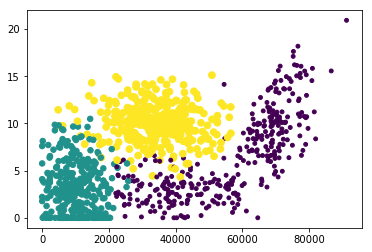

In [4]:
#个性化标记散点图上的点
#采用列1（飞行常客里程数--x轴）和列2（玩视频游戏--y轴）的属性值可以取得更好的效果
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*array(datingLables),15.0*array(datingLables))
plt.show()

In [7]:
#归一化特征值
def autoNorm(dataSet):
    minVals=dataSet.min(0)
    maxVals=dataSet.max(0)
    ranges=maxVals-minVals
    normDataSet=zeros(shape(dataSet))
    m=dataSet.shape[0]
    normDataSet=dataSet-tile(minVals,(m,1))
    normDataSet=normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals
normMat,ranges,minVals=autoNorm(datingDataMat)
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [9]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [11]:
minVals

array([ 0.      ,  0.      ,  0.001156])

In [27]:
#分类器针对约会网站的测试代码
def datingClassTest():
    hoRatio=0.10
    datingDataMat,datingLabels=file2matrix('data/datingTestSet2.txt')
    norMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    numTestVecs=int(m*hoRatio)
    errorCount=0.0
    for i in range(numTestVecs):
        classifierResult=classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with:{},the real answer is:{}".format(classifierResult,datingLabels[i]))
        if(classifierResult!=datingLables[i]):
            errorCount+=0
    print("the total error rate is:{}".format(errorCount/float(numTestVecs)))

In [28]:
datingClassTest()

一共有1000行数据
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 ..., 
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
the classifier came back with:3,the real answer is:3
the classifier came back with:2,the real answer is:2
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:3,the real answer is:3
the classifier came back with:3,the real answer is:3
the classifier came back with:1,the real answer is:1
the classifier came back with:3,the real answer is:3
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:2,the real answer is:2
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real answer is:1
the classifier came back with:1,the real an